In [1]:
# Import libraries and load data
import pandas as pd
from pycaret.classification import *

data = pd.read_csv('./data/hotel_revenue_edited.csv')
print(data.shape)
data.head()

(141497, 28)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,0,0,No Deposit,240,0,Transient,82.0,0,1,Canceled
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,0,0,No Deposit,15,0,Transient,105.5,0,0,Canceled
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,0,0,No Deposit,240,0,Transient,123.0,0,0,Canceled
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,0,0,No Deposit,240,0,Transient,107.0,0,2,Canceled
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,0,0,No Deposit,No Agent,0,Transient,108.3,0,2,Canceled


In [2]:
# Set up the experiment
s = setup(data, target = 'is_canceled', train_size=0.8,session_id=42)

,Description,Value
0,Session id,42
1,Target,is_canceled
2,Target type,Binary
3,Original data shape,"(141497, 28)"
4,Transformed data shape,"(141497, 58)"
5,Transformed train set shape,"(113197, 58)"
6,Transformed test set shape,"(28300, 58)"
7,Ordinal features,1
8,Numeric features,17
9,Categorical features,10


In [3]:
# Compare models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9998,1.0000,0.9994,1.0000,0.9997,0.9995,0.9995,9.9840
et,Extra Trees Classifier,0.9998,1.0000,0.9995,0.9999,0.9997,0.9995,0.9995,12.6980
lr,Logistic Regression,0.9995,1.0000,0.9988,1.0000,0.9994,0.9990,0.9990,23.7640
ridge,Ridge Classifier,0.9993,0.0000,0.9982,1.0000,0.9991,0.9986,0.9986,8.1440
lda,Linear Discriminant Analysis,0.9993,0.9992,0.9982,1.0000,0.9991,0.9986,0.9986,7.3690
dt,Decision Tree Classifier,0.9992,0.9992,0.9995,0.9982,0.9989,0.9982,0.9982,6.5560
qda,Quadratic Discriminant Analysis,0.9990,0.9996,0.9988,0.9984,0.9986,0.9978,0.9978,7.0040
nb,Naive Bayes,0.9987,0.9988,0.9988,0.9977,0.9982,0.9972,0.9972,7.4370
lightgbm,Light Gradient Boosting Machine,0.9981,1.0000,0.9999,0.9949,0.9974,0.9958,0.9959,7.3600
catboost,CatBoost Classifier,0.9979,1.0000,0.9998,0.9948,0.9972,0.9955,0.9956,28.5000


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [4]:
# Create the model
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9998,1.0000,0.9995,1.0000,0.9998,0.9996,0.9996
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9998,1.0000,0.9995,1.0000,0.9998,0.9996,0.9996
3,0.9998,1.0000,0.9995,1.0000,0.9998,0.9996,0.9996
4,0.9996,1.0000,0.9991,1.0000,0.9995,0.9992,0.9992
5,0.9997,1.0000,0.9993,1.0000,0.9996,0.9994,0.9994
6,0.9999,1.0000,0.9998,1.0000,0.9999,0.9998,0.9998
7,0.9995,1.0000,0.9986,1.0000,0.9993,0.9989,0.9989
8,0.9999,1.0000,0.9998,1.0000,0.9999,0.9998,0.9998


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [5]:
# Tune the model
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9996,0.9999,0.9991,1.0000,0.9995,0.9992,0.9992
1,0.9998,1.0000,0.9995,1.0000,0.9998,0.9996,0.9996
2,0.9996,1.0000,0.9988,1.0000,0.9994,0.9991,0.9991
3,0.9997,1.0000,0.9993,1.0000,0.9996,0.9994,0.9994
4,0.9995,1.0000,0.9986,1.0000,0.9993,0.9989,0.9989
5,0.9996,1.0000,0.9988,1.0000,0.9994,0.9991,0.9991
6,0.9993,0.9999,0.9981,1.0000,0.9991,0.9985,0.9985
7,0.9992,0.9999,0.9979,1.0000,0.9989,0.9983,0.9983
8,0.9998,1.0000,0.9995,1.0000,0.9998,0.9996,0.9996


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

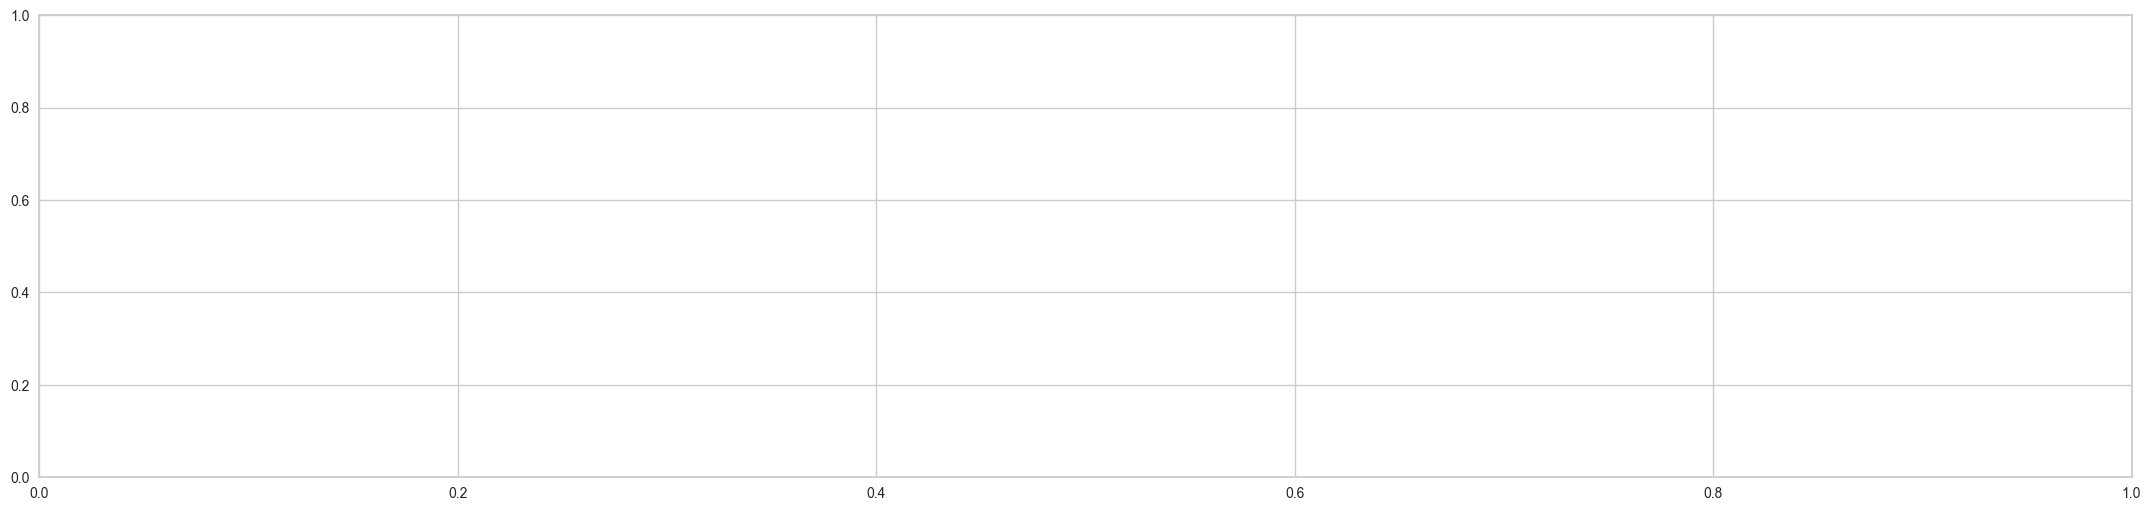

In [6]:
# Evaluate the model
evaluate_rf = evaluate_model(tuned_rf)

In [7]:
# Make the prediction on the model
pred_rf = predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9999,1.0000,0.9997,1.0000,0.9999,0.9998,0.9998


In [8]:
# Finalize the model
final_rf = finalize_model(tuned_rf)

In [9]:
final_rf

Pipeline(memory=FastMemory(location=C:\Users\biauser\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['lead_time', 'arrival_date_year',
                                             'arrival_date_week_number',
                                             'arrival_date_day_of_month',
                                             'stays_in_weekend_nights',
                                             'stays_in_week_nights', 'adults',
                                             'children', 'babies',
                                             'is_repeated_guest',
                                             'previous_cancel...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=42,
                                        verbose=0, warm_start=False))],
         verbose=False)